In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [10]:
# Now will print the value in the form of array of only 3rd and 4th column

x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [12]:
# we always use 'K-mean cluster' for segmentation(to seperate data)

from sklearn.cluster import KMeans
wcss=[] # will take empty list


In [13]:
# Now, will use loop for finding optimal value using Elbow method

for i in range(1,11):# bcz we assume possible clusters will not more than 10
    
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0) # init= 
    #-->> initiallisation of centroids
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)# Kmeans_inertia=
    # -->> formula use to segrigate data points into clusters.

C:\Users\akshansh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


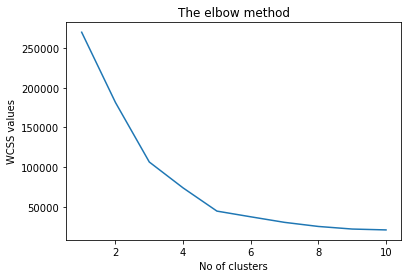

In [14]:
# Now, will plot Elbow graph

plt.plot(range(1,11),wcss) # no matter what range we select,will see same behaviour
plt.title('The elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()


In [ ]:
# so, here K- value = 3 & 5, as per the elbow method

In [16]:
# Now,will do initialise the model

kmeansmodel=KMeans(n_clusters=5,init='k-means++',random_state=0)

In [17]:
# After initializing use this model for prediction.

y_kmeans=kmeansmodel.fit_predict(x)

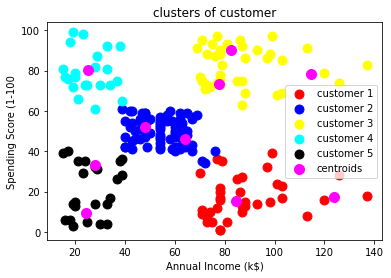

In [24]:
# Now, will plot all of our clusters using scatter plot

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=80,c='red',label='customer 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=80,c='blue',label='customer 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=80,c='yellow',label='customer 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=80,c='cyan',label='customer 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=80,c='black',label='customer 5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='centroids')
plt.title('clusters of customer')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100')
plt.legend()
plt.show()






In [ ]:
# pink color shows 'spendinds'
# other color shows salary

In [38]:
# 'customer 1' data

def customer_1(t,j):
    for t,j in zip(x[y_kmeans==0,0],x[y_kmeans==0,1]):
        print(t,j)
    
customer_1(x[y_kmeans==0,0],x[y_kmeans==0,1])


70 29
71 11
71 9
73 5
73 7
74 10
75 5
77 12
77 36
78 22
78 17
78 20
78 16
78 1
78 1
79 35
81 5
85 26
86 20
87 27
87 13
87 10
88 13
88 15
93 14
97 32
98 15
99 39
101 24
103 17
103 23
113 8
120 16
126 28
137 18


In [42]:
# 'customer 2' data

def customer_2(s,l):
    for s,l in zip(x[y_kmeans==1,0],x[y_kmeans==1,1]):
        print(s,l)
    
customer_2(x[y_kmeans==1,0],x[y_kmeans==1,1])


39 61
40 55
40 47
40 42
40 42
42 52
42 60
43 54
43 60
43 45
43 41
44 50
44 46
46 51
46 46
46 56
46 55
47 52
47 59
48 51
48 59
48 50
48 48
48 59
48 47
49 55
49 42
50 49
50 56
54 47
54 54
54 53
54 48
54 52
54 42
54 51
54 55
54 41
54 44
54 57
54 46
57 58
57 55
58 60
58 46
59 55
59 41
60 49
60 40
60 42
60 52
60 47
60 50
61 42
61 49
62 41
62 48
62 59
62 55
62 56
62 42
63 50
63 46
63 43
63 48
63 52
63 54
64 42
64 46
65 48
65 50
65 43
65 59
67 43
67 57
67 56
67 40
69 58
71 35
72 34
76 40
